## Problem Statement - " ! ROBUST YIELD PREDICTION OF VARIOUS FARM PROCESSING UNITS ! "

- GIVEN DATA
              # TRAIN_DATA 
1. - DATE
2. - FARM ID
3. - INGREDIENT TYPE
4. - YIELD(TARGET)

            # FARM DATA
1. - FARM
2. - ID OPERATIONS 
3. - COMMENCING YEAR 
4. - NUMBER OF PROCESSING PLANTS 
5. - FARM AREA 
6. - FARMING COMPANY 
7. - DEIDENTIFIED LOCATION 
            
            # WEATHER DATA
1. - TIMESTAMP
2. - DEIDENTIFIED LOCATION
3. - TEMPERATURE OBS 
4. - CLOUDINESS 
5. - WIND DIRECTION 
6. - DEW TEMPERATURE 
7. - PRESSURE SEA LEVEL 
8. - PRECIPITATION 
9. - WIND SPEED
    

In [1]:
# IMPORTING THE LIBRARIES TO WORK WITH THE DATA

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

### READING THE FILES

In [2]:
train=pd.read_csv("train_data.csv")


In [3]:
weather=pd.read_csv("train_weather.csv")


In [4]:
farm=pd.read_csv("farm_data.csv")

### CHECKING THE SHAPE OF THE DATA 

In [5]:
print(train.shape)
print(weather.shape)
print(farm.shape)

(20216100, 4)
(139773, 9)
(1449, 6)


- Train data has 20216100 rows and 4 columns
- weather data has 139773 rows and 9 columns
- farm has 1449 rows and 6 columns


In [6]:
# seeing the portion of the data
train.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [7]:
weather.head()


,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [8]:
farm.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


### The train and weather data have date with time as columns. We will convert it to pandas datetime 

In [9]:
# checking data types of the data frames 
train.dtypes

date                object
farm_id             object
ingredient_type     object
yield              float64
dtype: object

In [10]:
weather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [11]:
farm.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [12]:
# checking the unique values of the common columns of the data sets
print(train['farm_id'].nunique())
print(farm['farm_id'].nunique())
print(weather['deidentified_location'].nunique())
print(farm['deidentified_location'].nunique())

1434
1434
16
16


- The levels are same so merging will be done 

### By looking at the data types it can be seen that there are no invalid values in the data frames 

In [13]:
# Dropping the duplicate values
train.drop_duplicates(keep='first',inplace=True)

In [14]:
farm.drop_duplicates(keep='first',inplace=True)

In [15]:
weather.drop_duplicates(keep='first',inplace=True)

In [16]:
print(train.shape)
print(weather.shape)
print(farm.shape)


(20215983, 4)
(139773, 9)
(1449, 6)


### It can be seen that 117 duplicate rows have been removed from the train set .Farm and weather did not have duplicates

- checking the time span of train and weather data

In [17]:
train["date"].min(),train["date"].max()

('2016-01-01 00:00:00', '2016-12-31 23:00:00')

In [18]:
weather["timestamp"].min(),weather["timestamp"].max()

('2016-01-01 00:00:00', '2016-12-31 23:00:00')

### it can be seen that the weather and train data have values from 2016-01-01 to 2016-12-31 distributed hourwise for each farm id and location

In [19]:
## coverting the date column to pandas timestamp and then extracting monthwise period and adding that column to data frame
train["date"]=pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
train["Month"]=pd.to_datetime(train["date"]).dt.to_period('M').dt.to_timestamp()
train.head()

,date,farm_id,ingredient_type,yield,Month
0,2016-01-01,fid_110884,ing_w,0.0,2016-01-01
1,2016-01-01,fid_90053,ing_w,0.0,2016-01-01
2,2016-01-01,fid_17537,ing_w,0.0,2016-01-01
3,2016-01-01,fid_110392,ing_w,0.0,2016-01-01
4,2016-01-01,fid_62402,ing_w,0.0,2016-01-01


In [20]:
train.shape

(20215983, 5)

### Since i need the month wise data for the yield i will group the train data on the  month

In [21]:
# creating a new data frame named train monthly which has month wise yield of farm id 's 
train_monthly=train.groupby(["farm_id","ingredient_type","Month"])["yield"].sum().reset_index()
train_monthly.head()

,farm_id,ingredient_type,Month,yield
0,fid_100053,ing_w,2016-01-01,34909.76
1,fid_100053,ing_w,2016-02-01,31292.76
2,fid_100053,ing_w,2016-03-01,34688.64
3,fid_100053,ing_w,2016-04-01,33884.35
4,fid_100053,ing_w,2016-05-01,36967.32


In [22]:
train_monthly.shape

(28133, 4)

### Doing the same thing for the weather data that i did above in the train data.

In [23]:
weather["timestamp"]=pd.to_datetime(weather['timestamp'], format='%Y-%m-%d %H:%M:%S')
weather["Month"]=pd.to_datetime(weather["timestamp"]).dt.to_period('M').dt.to_timestamp()
weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Month
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0,2016-01-01
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5,2016-01-01
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0,2016-01-01
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0,2016-01-01
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6,2016-01-01


### I am grouping the weather data on month and de identified location and taking the mean of the numerical variables for the monthly period.

In [24]:
weather_monthly=weather.groupby(["Month","deidentified_location"])[["temp_obs","dew_temp","cloudiness","wind_direction","pressure_sea_level","precipitation","wind_speed"]].mean().reset_index()

In [25]:
weather_monthly.shape

(192, 9)

In [26]:
weather_monthly.head()

,Month,deidentified_location,temp_obs,dew_temp,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed
0,2016-01-01,location 1784,-2.833917,-5.797174,0.806540,161.831750,1022.234306,0.638327,2.292463
1,2016-01-01,location 2532,-7.868414,-11.459005,2.849693,215.362517,1017.842156,-0.032345,4.006317
2,2016-01-01,location 4525,-6.772157,-9.409489,NaN,198.349854,1013.177372,3.896104,3.517784
3,2016-01-01,location 5150,-3.407251,-7.855136,0.926316,207.657935,1013.955672,-0.098214,4.460968
4,2016-01-01,location 5290,1.625000,-5.664247,3.359918,214.021592,1018.093535,0.780619,4.234812


## Now i will merge the weather monthly data and farm data on the key de identified location 

In [27]:
# using the pandas merge function to merge the two data sets 
merge= pd.merge(farm,weather_monthly,on=["deidentified_location"])
merge.head(10)

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,Month,temp_obs,dew_temp,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-01-01,14.714305,9.211336,3.667774,196.702997,1018.112466,1.796770,3.642876
1,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-02-01,16.139655,8.870546,2.312073,197.967836,1020.102457,0.593391,4.054741
2,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-03-01,21.266263,14.429973,3.266272,174.499314,1018.672666,1.740591,3.633602
3,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-04-01,22.431250,14.591806,3.026906,142.922636,1017.275145,0.197222,3.759306
4,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-05-01,24.734274,17.237097,2.764957,157.332402,1016.178997,1.215054,3.219758
5,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-06-01,27.366389,21.935556,3.668421,133.445255,1016.419161,2.969444,2.989306
6,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-07-01,28.552823,22.730108,3.256303,128.235294,1018.831132,1.297043,2.309543
7,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-08-01,27.613575,23.107796,3.529412,126.624826,1017.050202,2.856183,3.073790
8,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-09-01,26.871944,22.607083,3.578667,125.143266,1016.325630,2.570833,2.799306
9,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-10-01,24.038172,18.473790,2.942643,148.960864,1016.299323,0.794355,4.609812


### I have got month wise distributiion of the weather attributes of each farm id.

In [28]:
merge.shape

(17388, 14)

## Now i will merge my train_monthly data and the merged data of the weather and farm

In [237]:
data=pd.merge(merge,train_monthly,on=["farm_id","Month"])
train_data=data.copy()
data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,Month,temp_obs,dew_temp,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed,ingredient_type,yield
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-01-01,14.714305,9.211336,3.667774,196.702997,1018.112466,1.796770,3.642876,ing_w,133.7818
1,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-02-01,16.139655,8.870546,2.312073,197.967836,1020.102457,0.593391,4.054741,ing_w,0.0000
2,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-03-01,21.266263,14.429973,3.266272,174.499314,1018.672666,1.740591,3.633602,ing_w,0.0000
3,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-04-01,22.431250,14.591806,3.026906,142.922636,1017.275145,0.197222,3.759306,ing_w,59.3827
4,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2016-05-01,24.734274,17.237097,2.764957,157.332402,1016.178997,1.215054,3.219758,ing_w,58056.7689


## I have got all the three data sets merged . now we can work with visualisation

In [30]:
# checking the data types of the variables in my merged data 
data.dtypes

farm_id                               object
operations_commencing_year           float64
num_processing_plants                float64
farm_area                            float64
farming_company                       object
deidentified_location                 object
Month                         datetime64[ns]
temp_obs                             float64
dew_temp                             float64
cloudiness                           float64
wind_direction                       float64
pressure_sea_level                   float64
precipitation                        float64
wind_speed                           float64
ingredient_type                       object
yield                                float64
dtype: object

### checking the missing values 

In [31]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
num_processing_plants,23554,82.700748
operations_commencing_year,16900,59.337804
precipitation,2268,7.963204
pressure_sea_level,1080,3.792002
cloudiness,672,2.359468
yield,0,0.000000
ingredient_type,0,0.000000
wind_speed,0,0.000000
wind_direction,0,0.000000
dew_temp,0,0.000000


# Insights 
 
  1. Number of processing plant has 82 percent missing values. We can check its correlation with the yield and then it can be 
     used to see whether to impute or drop this column
  2. Operations commencing year can also be checked and then decision can be made to keep it or discard .
  3. Other variables precipation , pressure sea level and cloudiness can be imputed 

In [32]:
data.describe()

,operations_commencing_year,num_processing_plants,farm_area,temp_obs,dew_temp,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed,yield
count,11581.000000,4927.000000,28481.000000,28481.000000,28481.000000,27809.000000,28481.000000,27401.000000,26213.000000,28481.000000,2.848100e+04
mean,1967.934116,8.147351,9929.236359,15.722466,7.546334,1.841334,171.248330,1016.108085,1.582967,3.393842,1.508685e+06
std,30.334341,3.976612,10795.487749,9.808844,8.841061,1.398723,36.712969,3.183199,3.500766,0.921925,9.195239e+07
min,1900.000000,5.000000,26.291549,-7.868414,-11.459005,0.000000,73.622047,1003.108016,-0.098214,1.529364,0.000000e+00
25%,1951.000000,5.000000,2957.009587,8.840556,1.227738,0.625000,142.922636,1014.361798,0.291667,2.772043,1.765982e+04
50%,1969.000000,7.000000,6698.492106,16.698925,7.714943,1.527273,174.499314,1016.299323,0.671602,3.362366,6.389758e+04
75%,1993.000000,10.000000,12802.590818,23.339028,14.404444,2.830700,197.967836,1018.101547,1.211022,4.014113,2.042079e+05
max,2017.000000,30.000000,81290.125000,36.389098,23.107796,6.133423,270.616438,1027.612231,31.418605,6.930321,8.762477e+09


## Insights from the statistical distribution of data 
  
   1. Number of processing plants has a minimum of 5 and maximum of 30 plants  
   2. Temperature holds from a negative -7 to maximum of 36 degrees 
   3. wind direction shows a high variance 

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


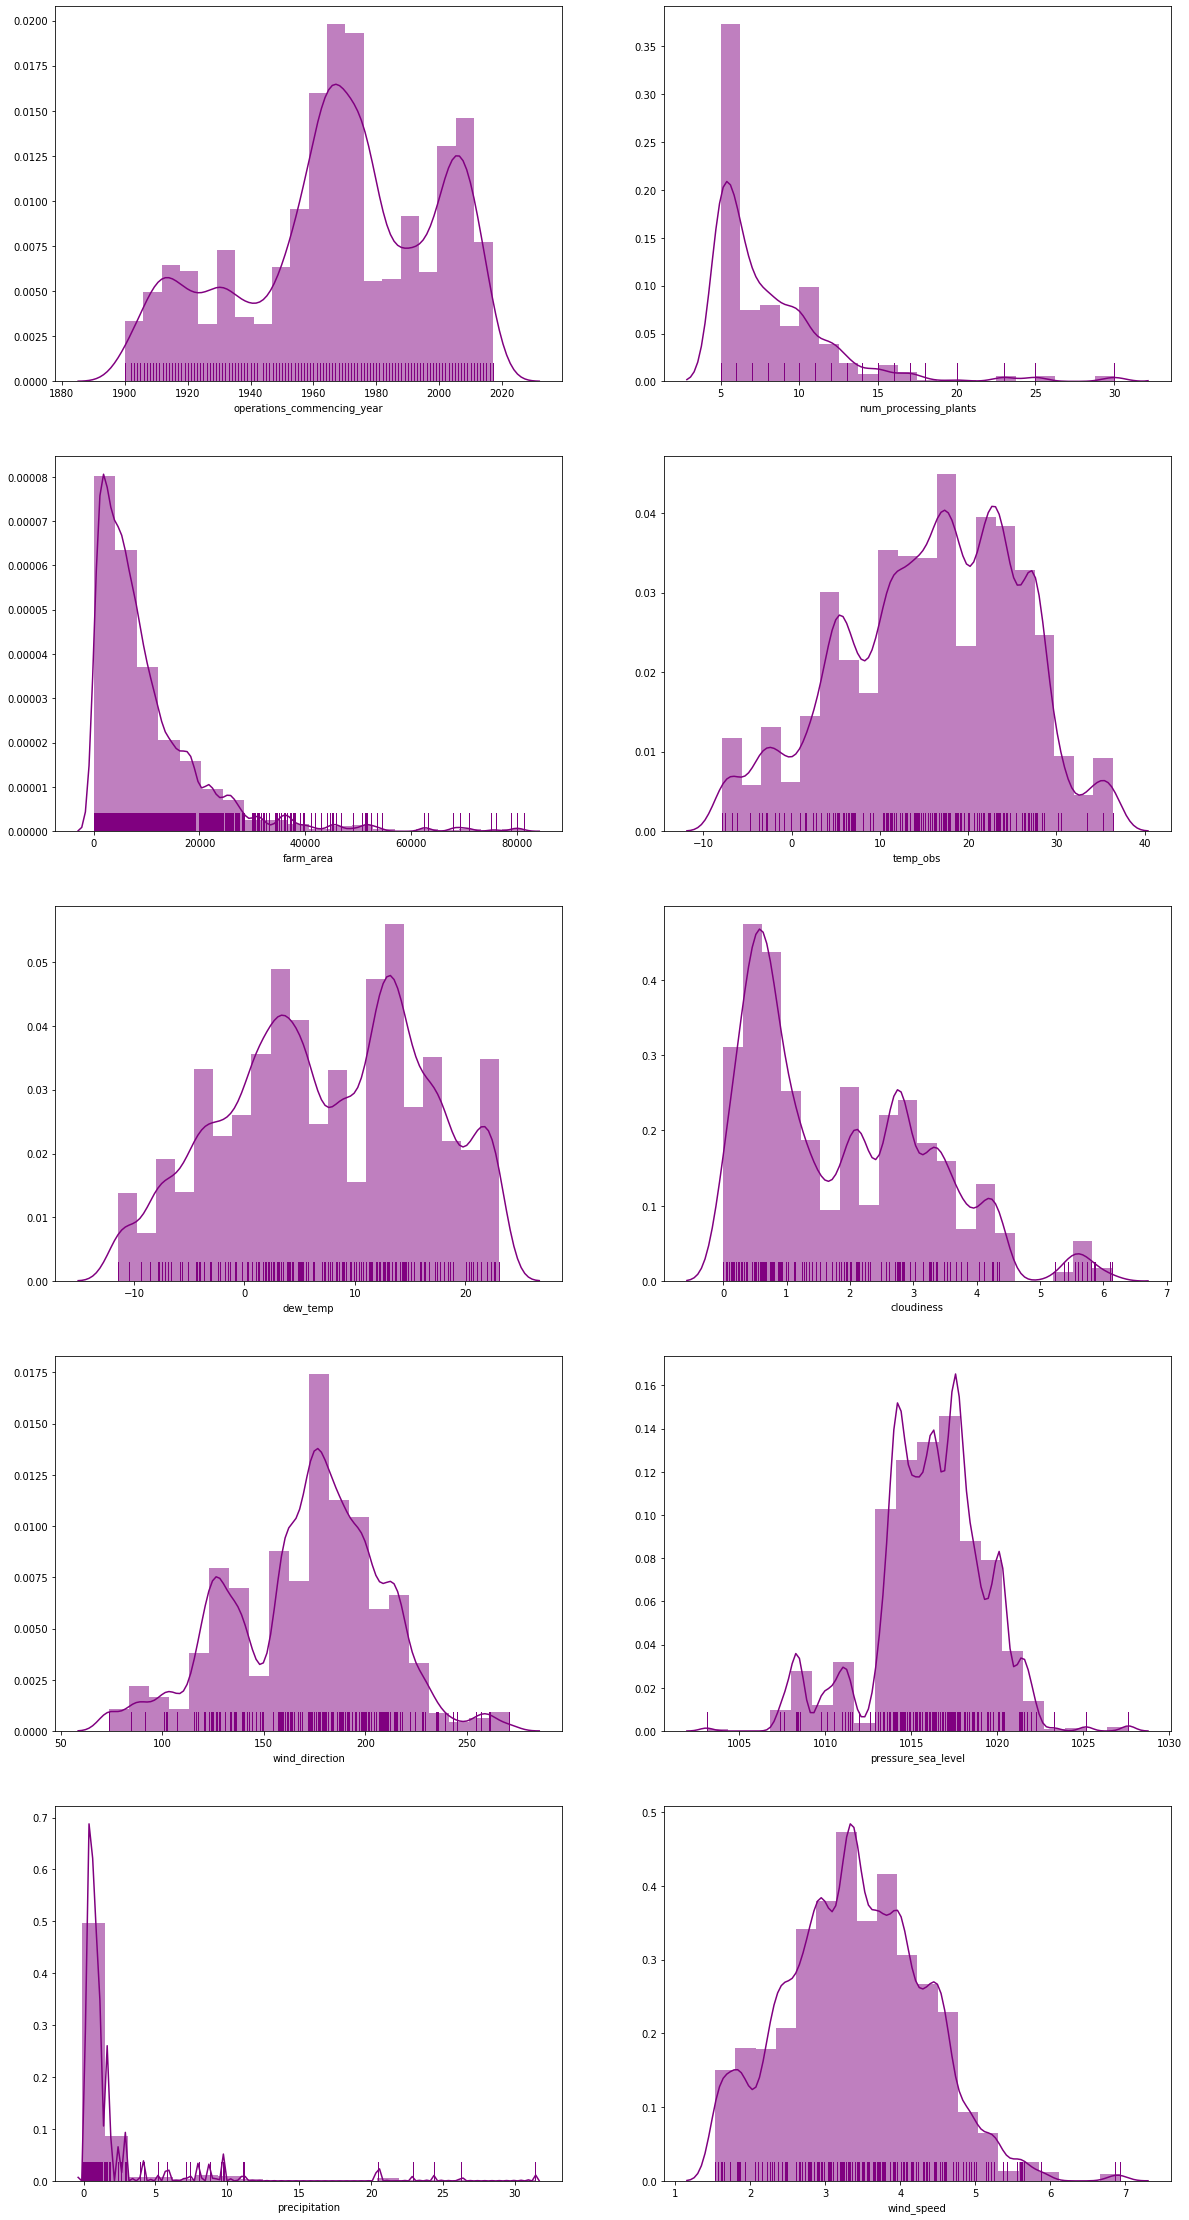

In [33]:
num_cols=['operations_commencing_year','num_processing_plants','farm_area','temp_obs','dew_temp','cloudiness','wind_direction',
           'pressure_sea_level','precipitation','wind_speed']
fig, ax = plt.subplots(5, 2, figsize = (20, 40))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.distplot(data[var], bins = 20, kde = True, rug = True, color = 'purple', 
                 ax = subplot, hist_kws = {"alpha": 0.5})

# Insights 
 1. Num of processing plants is right skewed with lot of values in the tail and some extreme values as well 
 2. Precipitaion has values in the extremes but can be considered as normally distributed for a certain range 
 3. The spread of Dew temperature and Absolute Temperature is over a large range . Variance of these two is high 
 4. Cloudiness is right skewed with large spread (variance)

Some methods which can be applied 
1. We can apply log transformations on some variables

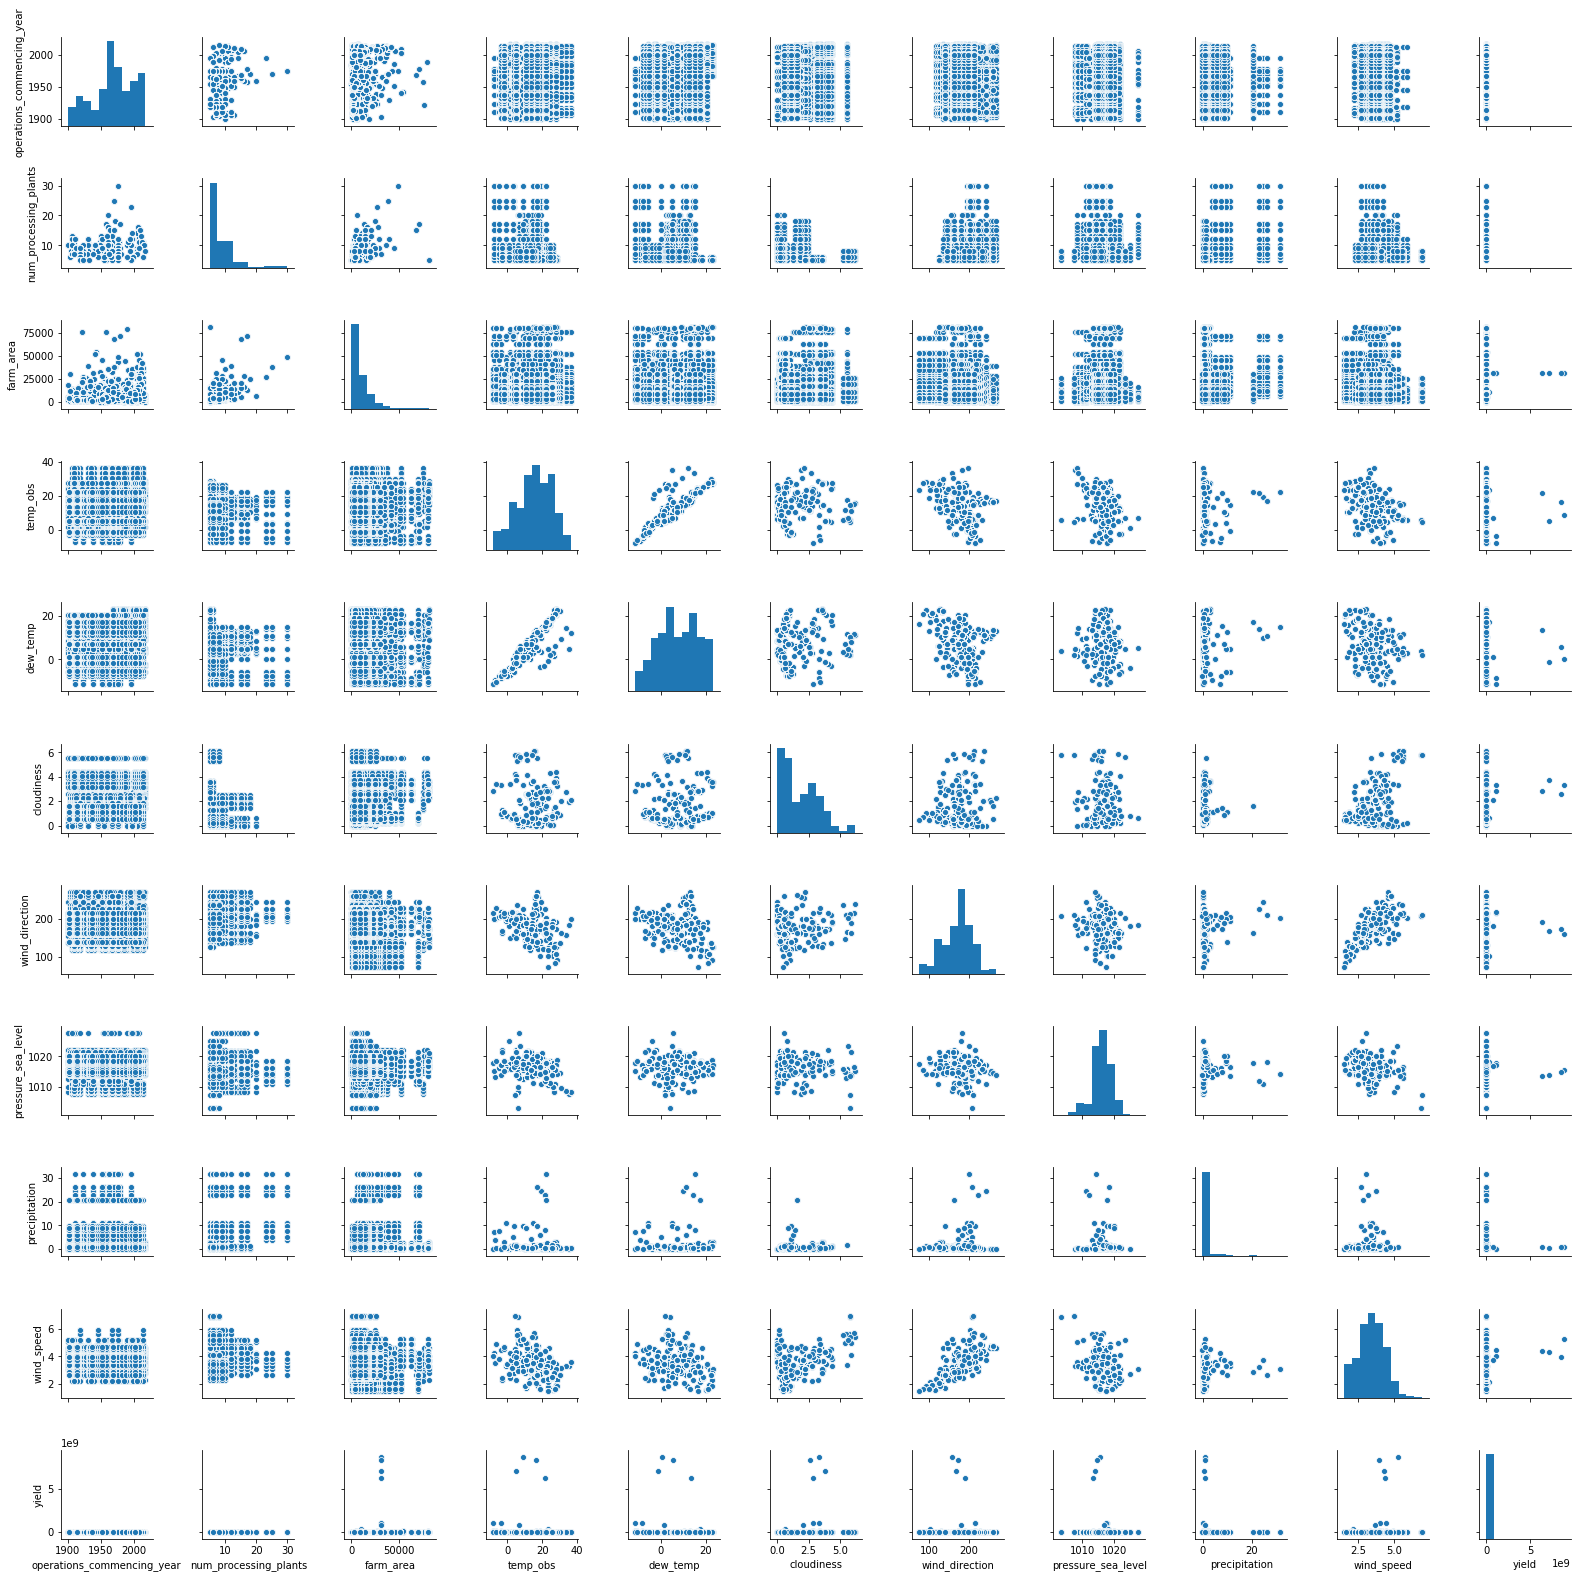

In [34]:
# drawing the pair plots between the numerical variables
sns.pairplot(data, height=2)

## Insights
  
  1. Temperature absolute shows a positive linear relationship with Dew Temperature. They are correlated with each other. 
  2. Wind Speed and Wind Direction shows a positive linear relationship . They are correalated with each other
  3. Dew Temperature and Absolute temperature show negative relationship with wind speed .

TO CHECK- The variables correlated with each other result in multicollinearity . We can drop these or engineer new ones

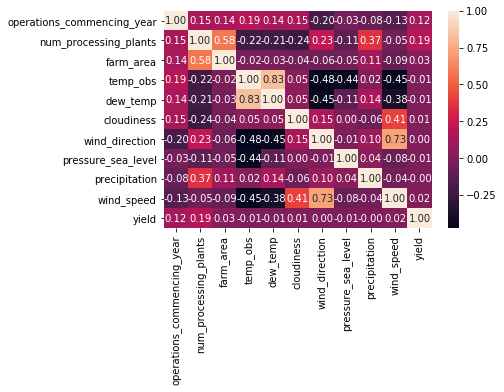

In [35]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, fmt = '.2f')

# Insights 

1. High correlation between dew_temp and absolute temperature .
2. High correlation between wind speed and wind direction.
3. Negative correlation of dew temperature and absolute temperature with wind direction and wind speed
4. The target yield is has weak positive correlation with number of processing plants.

The high correlation features among will result in multicollinearity.We can select features that best relate with our target.
New features can also be engineered.
Variance inflation factor can be run to see which features to keep .

## Lets see the time series analysis to get the insights 

- we will be creating the data with only the month and the target (yield) to perform time series 

In [36]:
data_time_series= data.copy()
data_time_series= data_time_series.groupby("Month")["yield"].sum().reset_index()
data_time_series.head()

,Month,yield
0,2016-01-01,1.983353e+09
1,2016-02-01,1.821257e+09
2,2016-03-01,7.729605e+09
3,2016-04-01,9.399604e+09
4,2016-05-01,9.049512e+09


In [37]:
# putting the index as month  for time series analysis 
data_time_series=data_time_series.set_index("Month")
data_time_series.index=pd.to_datetime(data_time_series.index,yearfirst=True)
data_time_series.head()

,yield
Month,
2016-01-01,1.983353e+09
2016-02-01,1.821257e+09
2016-03-01,7.729605e+09
2016-04-01,9.399604e+09
2016-05-01,9.049512e+09


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


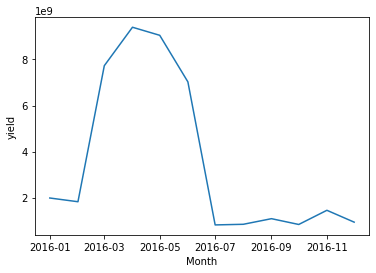

In [38]:
plt.xlabel('Month')
plt.ylabel('yield')
plt.plot(data_time_series)

## insight

1. It is visible that the yield from the 3 month to 6 month reaches high maximum values and decreases in the later years
2. There doesnt seem to be a significant trend of any sort

## Decomposing our time series to get TREND,SEASONALITY and RANDOMNESSS from the original distribution

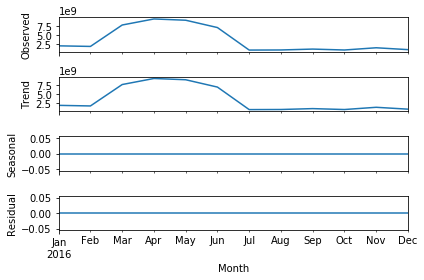

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_time_series, model='additive', freq=1)
result.plot()
plt.show()

## plotting acf (autocorrelation)

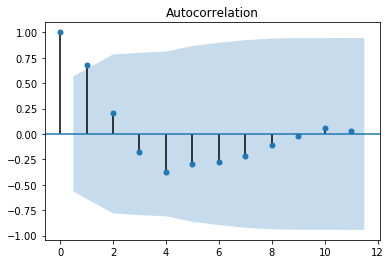

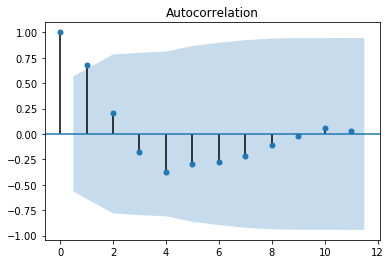

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_time_series)

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


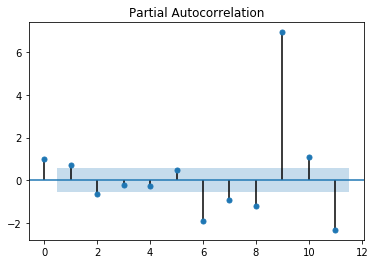

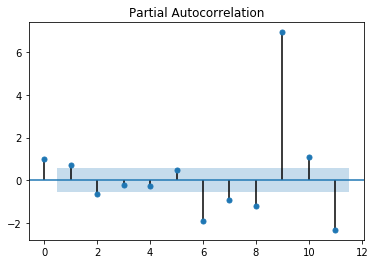

In [41]:
plot_pacf(data_time_series)

## Insights

1. There is no seasonality in the data
2. There is no significant trend 

# Function to check stationarity of our dataset by Dickey-Fuller Test

- Null hypothesis- The data is non stationary.
- Alternate hypothesis- The data is stationary.

In [42]:
from statsmodels.tsa.stattools import adfuller
window = 3
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    orig = plt.plot(data_time_series, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(data_time_series.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

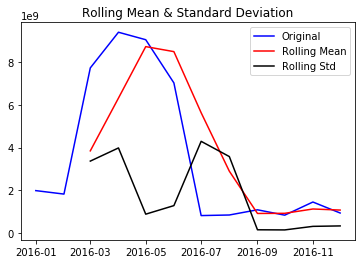

Results of Dickey-Fuller Test:
Test Statistic                 -1.193410
p-value                         0.676424
#Lags Used                      0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [43]:
test_stationarity(data_time_series)

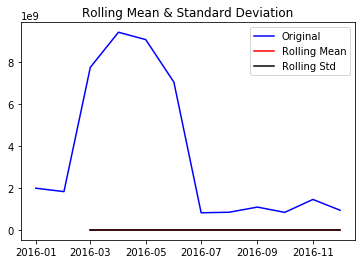

Results of Dickey-Fuller Test:
Test Statistic                 -1.193410
p-value                         0.676424
#Lags Used                      0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [44]:
data_time_series_log = np.log(data_time_series)
test_stationarity(data_time_series_log)

## Insights
- In the first graph the the p-value and t statistic tell us that the We fail to reject the null hypothesis.
    1. Data is not stationary
    
- In the second graph when we did a log transformation Still the pvalue and t statistics tell us that the We fail to reject the null hypothesis.
    1. Data is not stationary

In [32]:
# performing knn imputation on the columns which had missing data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor

num_imputer = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors = 5))

In [33]:
num_cols=['num_processing_plants','operations_commencing_year','precipitation','pressure_sea_level','cloudiness']

In [35]:
data_check=data.copy()

In [36]:
data_check[num_cols]=num_imputer.fit_transform(data_check[num_cols])

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [37]:
data_check['num_processing_plants'].corr(data_check['yield'])

-0.0036505746726294697

# Insight 
1. Earlier before imputation the correlation of number of farms with yield was weakly positive.But after the missing values got
imputed the correlation became negative which does not seem to be logical.
The reason for negative correlation might be due to presence of only 20% data in the column so on imputation it didnt work
2. We can drop this column 

3. The operations commencing year can also be dropped since it does not seem to be significant

In [34]:
data.drop(['num_processing_plants','operations_commencing_year'],axis=1,inplace=True)

In [35]:
# i am also dropping dew temperature wind direction since they were correlated with other features 
data.drop(['wind_direction','dew_temp'],axis=1,inplace=True)

In [40]:
farms_yield=data.groupby("farming_company")["yield"].sum().reset_index()
farms_yield.sort_values(by="yield")

,farming_company,yield
12,Southern Confederate Farms,3.441046e+05
6,Mountaire Farms,6.081023e+06
15,West Liberty Foods,1.072838e+07
13,Tyson Foods,1.574746e+07
4,Kansas Ville Farms,2.881735e+07
9,Other,3.359711e+07
10,Perdue Farms,3.478696e+07
5,Monogram Foods,3.594097e+07
3,Freight Farms,3.621422e+07
2,Foster Farms,2.962295e+08


In [53]:
farms_yield["farming_company"].values

array(['Del Monte Foods', 'Dole Food Company', 'Foster Farms',
       'Freight Farms', 'Kansas Ville Farms', 'Monogram Foods',
       'Mountaire Farms', 'Northland Organic Foods Corporation',
       'Obery Farms', 'Other', 'Perdue Farms', 'Sanderson Farms',
       'Southern Confederate Farms', 'Tyson Foods', 'Wayne Farms',
       'West Liberty Foods'], dtype=object)

Text(0.5, 0, 'COMPANIES')

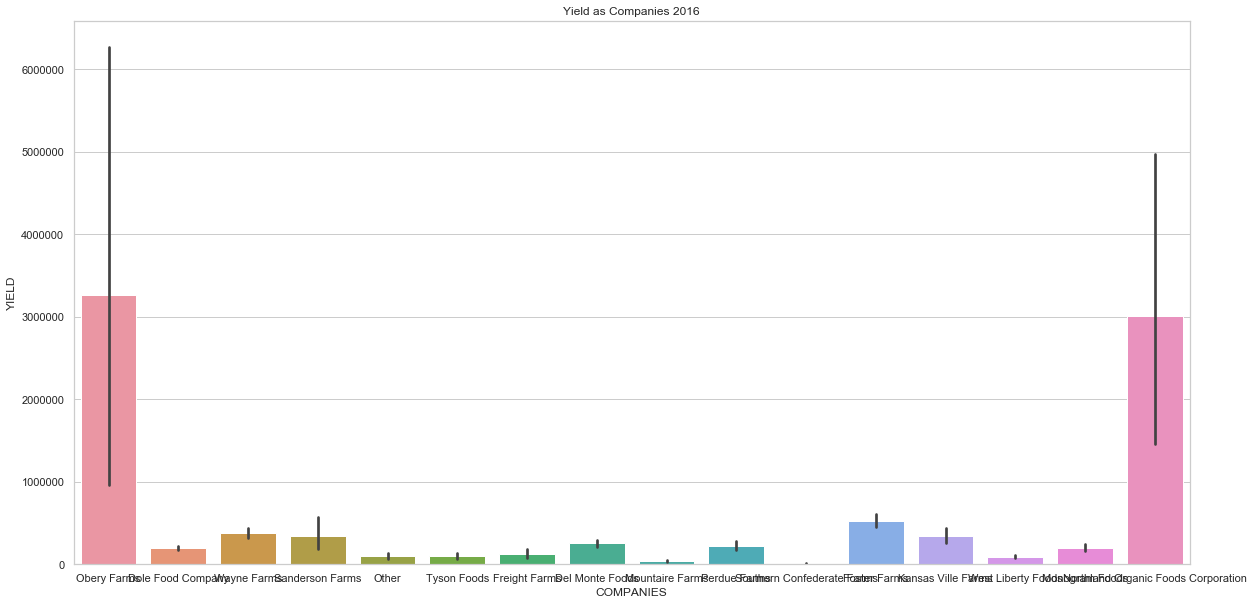

In [54]:
sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="farming_company", y="yield", data=data)
ax.set_title("Yield as Companies 2016")
ax.set_ylabel("YIELD")
ax.set_xlabel("COMPANIES")

In [41]:
loc_yield=data.groupby("deidentified_location")["yield"].sum().reset_index()
loc_yield.sort_values(by="yield")

,deidentified_location,yield
14,location 868,1.783887e+07
10,location 6364,2.617537e+07
11,location 7048,3.131625e+07
8,location 5677,4.435839e+07
15,location 959,8.274426e+07
9,location 5833,1.446830e+08
0,location 1784,1.908984e+08
4,location 5290,4.341818e+08
2,location 4525,4.464048e+08
6,location 5489,4.681094e+08


Text(0.5, 0, 'LOCATION')

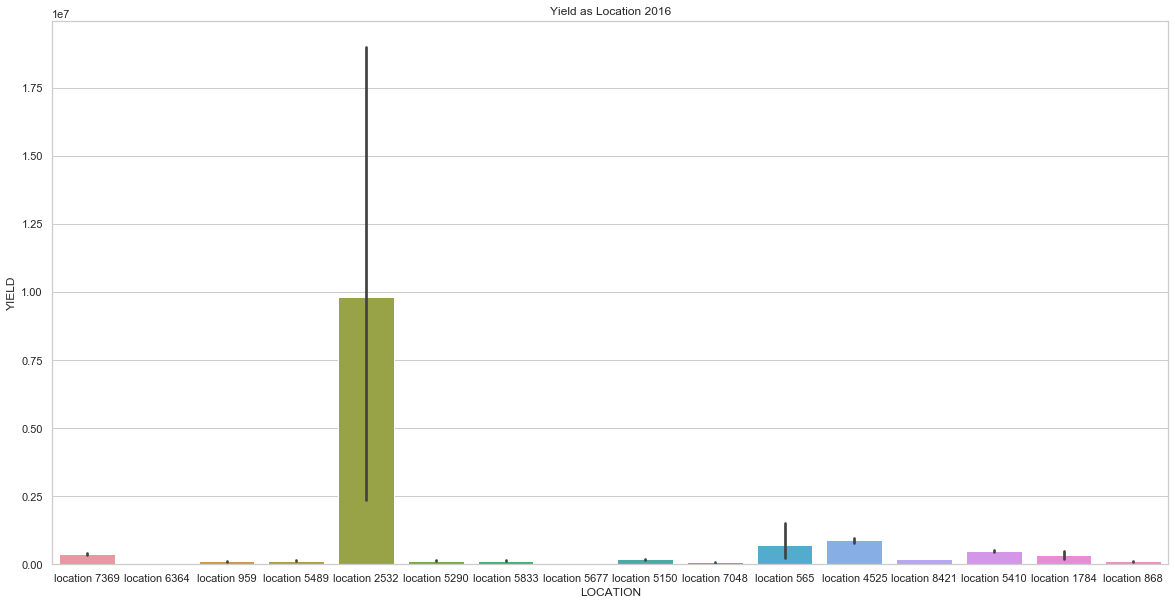

In [56]:
sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="deidentified_location", y="yield", data=data)
ax.set_title("Yield as Location 2016")
ax.set_ylabel("YIELD")
ax.set_xlabel("LOCATION")

## INSIGHTS - I have seen the distribution of yield with respect to the company and the locations separately
1. I have merged the companies as high yielding , low yielding and medium yielding.
2. I have merged the location as high yielding,low yielding and medium yielding.

In [36]:
data['farming_company'].replace({'Sanderson Farms':'High Yielding','Wayne Farms':'High Yielding','Obery Farms':'High Yielding',
                                 'Del Monte Foods':'Medium Yielding', 'Dole Food Company':'Medium Yielding',
                                 'Foster Farms':'Medium Yielding','Freight Farms':'Medium Yielding',
                                 'Kansas Ville Farms':'Medium Yielding', 'Monogram Foods':'Medium Yielding',
                                 'Northland Organic Foods Corporation':'Medium Yielding', 'Other':'Medium Yielding',
                                 'Perdue Farms':'Medium Yielding','Tyson Foods':'Medium Yielding',
                                 'West Liberty Foods':'Medium Yielding','Mountaire Farms':'Low Yielding',
                                 'Southern Confederate Farms':'Low Yielding'},inplace=True)         
          
data['deidentified_location'].replace({'location 2532':'High Yielding location','location 5410':'High Yielding location',
                                 'location 8421':'Medium Yielding location', 'location 565':'Medium Yielding location',
                                 'location 7369':'Medium Yielding location','location 5150':'Medium Yielding location',
                                 'location 5489':'Medium Yielding location', 'location 4525':'Medium Yielding location',
                                 'location 5290':'Medium Yielding location', 'location 1784':'Medium Yielding location',
                                 'location 5833':'Medium Yielding location','location 959':'Low Yielding location',
                                 'location 5677':'Low Yielding location','location 7048':'Low Yielding location',
                                 'location 6364':'Low Yielding location','location 868':'Low Yielding location'},inplace=True)
data['farming_company']=data['farming_company'].astype('category')
data['deidentified_location']=data['deidentified_location'].astype('category')


In [37]:
data.head()

,farm_id,farm_area,farming_company,deidentified_location,Month,temp_obs,cloudiness,pressure_sea_level,precipitation,wind_speed,ingredient_type,yield
0,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-01-01,14.714305,3.667774,1018.112466,1.796770,3.642876,ing_w,133.7818
1,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-02-01,16.139655,2.312073,1020.102457,0.593391,4.054741,ing_w,0.0000
2,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-03-01,21.266263,3.266272,1018.672666,1.740591,3.633602,ing_w,0.0000
3,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-04-01,22.431250,3.026906,1017.275145,0.197222,3.759306,ing_w,59.3827
4,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-05-01,24.734274,2.764957,1016.178997,1.215054,3.219758,ing_w,58056.7689


### Reading the test data 

In [38]:
test=pd.read_csv("test_data.csv")
test.head()


,date,farm_id,ingredient_type,id
0,2017-01-01 00:00:00,fid_110884,ing_w,0
1,2017-01-01 00:00:00,fid_90053,ing_w,1
2,2017-01-01 00:00:00,fid_17537,ing_w,2
3,2017-01-01 00:00:00,fid_110392,ing_w,3
4,2017-01-01 00:00:00,fid_62402,ing_w,4


In [39]:
weather_test=pd.read_csv("test_weather.csv")
weather_test.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 01:00:00,location 7369,17.8,2.0,130.0,12.8,1022.0,0.0,3.1
2,2017-01-01 02:00:00,location 7369,16.1,0.0,140.0,12.8,1021.9,0.0,3.1
3,2017-01-01 03:00:00,location 7369,17.2,0.0,140.0,13.3,1022.2,0.0,3.1
4,2017-01-01 04:00:00,location 7369,16.7,2.0,130.0,13.3,1022.3,0.0,2.6


### Grouping my test data according to month . Similar according to my train data

In [40]:
test["date"]=pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test["Month"]=pd.to_datetime(test["date"]).dt.to_period('M').dt.to_timestamp()
test=test.groupby(["farm_id","ingredient_type","Month"])["id"].sum().reset_index()
test.head()

,farm_id,ingredient_type,Month,id
0,fid_100053,ing_w,2017-01-01,6367489555
1,fid_100053,ing_w,2017-02-01,5851745760
2,fid_100053,ing_w,2017-03-01,6623048569
3,fid_100053,ing_w,2017-04-01,6553810800
4,fid_100053,ing_w,2017-05-01,6921493752


In [41]:
# changing to monthly period
weather_test["timestamp"]=pd.to_datetime(weather_test['timestamp'], format='%Y-%m-%d %H:%M:%S')
weather_test["Month"]=pd.to_datetime(weather_test["timestamp"]).dt.to_period('M').dt.to_timestamp()
weather_test.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Month
0,2017-01-01 00:00:00,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6,2017-01-01
1,2017-01-01 01:00:00,location 7369,17.8,2.0,130.0,12.8,1022.0,0.0,3.1,2017-01-01
2,2017-01-01 02:00:00,location 7369,16.1,0.0,140.0,12.8,1021.9,0.0,3.1,2017-01-01
3,2017-01-01 03:00:00,location 7369,17.2,0.0,140.0,13.3,1022.2,0.0,3.1,2017-01-01
4,2017-01-01 04:00:00,location 7369,16.7,2.0,130.0,13.3,1022.3,0.0,2.6,2017-01-01


In [42]:
weather_test_monthly=weather_test.groupby(["Month","deidentified_location"])[["temp_obs","dew_temp","cloudiness","wind_direction","pressure_sea_level","precipitation","wind_speed"]].mean().reset_index()

In [43]:
weather_test_monthly.head()

,Month,deidentified_location,temp_obs,dew_temp,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed
0,2017-01-01,location 1784,-5.154251,-7.523347,1.035019,168.312925,1020.606583,0.836707,2.278947
1,2017-01-01,location 2532,-6.092742,-9.943011,3.075988,217.034014,1016.923706,0.228802,3.901882
2,2017-01-01,location 4525,-4.972923,-7.521839,NaN,191.514327,1014.092672,5.990385,3.196562
3,2017-01-01,location 5150,-1.285266,-4.495089,1.567073,198.085399,1015.595944,1.496503,4.124557
4,2017-01-01,location 5290,5.443472,-0.968237,5.450746,194.910591,1017.696783,0.625337,4.306326


In [44]:
merge_test= pd.merge(farm,weather_test_monthly,on=["deidentified_location"])
merge_test.head(10)

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,Month,temp_obs,dew_temp,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01,17.910215,12.062097,2.803357,179.795362,1019.854939,0.627187,3.503091
1,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-02-01,19.672768,13.093601,2.170678,167.206107,1018.082681,0.337798,3.207589
2,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-03-01,20.209140,11.432258,2.304432,140.532213,1021.626819,0.008065,3.828629
3,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-04-01,23.344861,14.854028,2.743478,132.861190,1017.662656,-0.013986,4.044167
4,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-05-01,24.596102,17.857661,2.450000,171.000000,1015.204918,1.059140,3.867339
5,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-06-01,25.091806,22.876667,4.547718,128.340548,1015.974399,1.695833,2.832083
6,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-07-01,26.897984,23.613710,3.686813,124.271570,1017.912483,2.606183,2.373790
7,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-08-01,27.340995,24.014382,3.698324,138.984701,1016.138283,1.775538,2.775806
8,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-09-01,26.418889,23.075000,3.404313,128.108108,1013.383144,3.816667,3.517917
9,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-10-01,23.599597,19.567742,2.795181,117.726658,1016.413784,1.033693,4.256452


In [236]:
# merging the test data 
data_test=pd.merge(merge_test,test,on=["farm_id","Month"])
# creating a copy for future reference
test_data=data_test.copy()
data_test.head()


,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,Month,temp_obs,dew_temp,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed,ingredient_type,id
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01,17.910215,12.062097,2.803357,179.795362,1019.854939,0.627187,3.503091,ing_w,35655084
1,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-02-01,19.672768,13.093601,2.170678,167.206107,1018.082681,0.337798,3.207589,ing_w,93579858
2,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-03-01,20.209140,11.432258,2.304432,140.532213,1021.626819,0.008065,3.828629,ing_w,171557100
3,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-04-01,23.344861,14.854028,2.743478,132.861190,1017.662656,-0.013986,4.044167,ing_w,234011160
4,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-05-01,24.596102,17.857661,2.450000,171.000000,1015.204918,1.059140,3.867339,ing_w,312065964


In [46]:
data_test.sort_values(by=['id'],ascending=True,inplace=True)

### combining the categories in test similar to the train

In [47]:

data_test=data_test.drop(["id"],axis=1)
data_test['farming_company'].replace({'Sanderson Farms':'High Yielding','Wayne Farms':'High Yielding','Obery Farms':'High Yielding',
                                 'Del Monte Foods':'Medium Yielding', 'Dole Food Company':'Medium Yielding',
                                 'Foster Farms':'Medium Yielding','Freight Farms':'Medium Yielding',
                                 'Kansas Ville Farms':'Medium Yielding', 'Monogram Foods':'Medium Yielding',
                                 'Northland Organic Foods Corporation':'Medium Yielding', 'Other':'Medium Yielding',
                                 'Perdue Farms':'Medium Yielding','Tyson Foods':'Medium Yielding',
                                 'West Liberty Foods':'Medium Yielding','Mountaire Farms':'Low Yielding',
                                 'Southern Confederate Farms':'Low Yielding'},inplace=True)  
data_test['deidentified_location'].replace({'location 2532':'High Yielding location','location 5410':'High Yielding location',
                                 'location 8421':'Medium Yielding location', 'location 565':'Medium Yielding location',
                                 'location 7369':'Medium Yielding location','location 5150':'Medium Yielding location',
                                 'location 5489':'Medium Yielding location', 'location 4525':'Medium Yielding location',
                                 'location 5290':'Medium Yielding location', 'location 1784':'Medium Yielding location',
                                 'location 5833':'Medium Yielding location','location 959':'Low Yielding location',
                                 'location 5677':'Low Yielding location','location 7048':'Low Yielding location',
                                 'location 6364':'Low Yielding location','location 868':'Low Yielding location'},inplace=True) 
data_test['farming_company']=data_test['farming_company'].astype('category')
data_test['deidentified_location']=data_test['deidentified_location'].astype('category')

In [48]:
data_test.isnull().sum()

farm_id                           0
operations_commencing_year    16956
num_processing_plants         23712
farm_area                         0
farming_company                   0
deidentified_location             0
Month                             0
temp_obs                          0
dew_temp                          0
cloudiness                      672
wind_direction                    0
pressure_sea_level             1080
precipitation                  2268
wind_speed                        0
ingredient_type                   0
dtype: int64

In [49]:
# checking percentage of missing values
missing_values_test = data_test.isnull().sum().sort_values(ascending = False)
percentage_missing_values_test = (missing_values_test/len(data_test))*100
pd.concat([missing_values_test, percentage_missing_values_test], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
num_processing_plants,23712,82.608696
operations_commencing_year,16956,59.071906
precipitation,2268,7.901338
pressure_sea_level,1080,3.762542
cloudiness,672,2.341137
ingredient_type,0,0.000000
wind_speed,0,0.000000
wind_direction,0,0.000000
dew_temp,0,0.000000
temp_obs,0,0.000000


In [72]:
# seeing the portion of the data
data.head()

,farm_id,farm_area,farming_company,deidentified_location,Month,temp_obs,cloudiness,pressure_sea_level,precipitation,wind_speed,ingredient_type,yield
0,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-01-01,14.714305,3.667774,1018.112466,1.796770,3.642876,ing_w,133.7818
1,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-02-01,16.139655,2.312073,1020.102457,0.593391,4.054741,ing_w,0.0000
2,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-03-01,21.266263,3.266272,1018.672666,1.740591,3.633602,ing_w,0.0000
3,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-04-01,22.431250,3.026906,1017.275145,0.197222,3.759306,ing_w,59.3827
4,fid_110884,690.455096,High Yielding,Medium Yielding location,2016-05-01,24.734274,2.764957,1016.178997,1.215054,3.219758,ing_w,58056.7689


In [50]:
#dropping the columns i dropped in the train data
data_test.drop(['num_processing_plants','operations_commencing_year','wind_direction','dew_temp'],axis=1,inplace=True)

In [51]:
data_test.head()

,farm_id,farm_area,farming_company,deidentified_location,Month,temp_obs,cloudiness,pressure_sea_level,precipitation,wind_speed,ingredient_type
0,fid_110884,690.455096,High Yielding,Medium Yielding location,2017-01-01,17.910215,2.803357,1019.854939,0.627187,3.503091,ing_w
12,fid_90053,252.696160,High Yielding,Medium Yielding location,2017-01-01,17.910215,2.803357,1019.854939,0.627187,3.503091,ing_w
24,fid_17537,499.446528,High Yielding,Medium Yielding location,2017-01-01,17.910215,2.803357,1019.854939,0.627187,3.503091,ing_w
36,fid_110392,2200.407555,High Yielding,Medium Yielding location,2017-01-01,17.910215,2.803357,1019.854939,0.627187,3.503091,ing_w
48,fid_62402,10833.140121,High Yielding,Medium Yielding location,2017-01-01,17.910215,2.803357,1019.854939,0.627187,3.503091,ing_w


In [52]:
#storing the mean value and standard deviation for future use  
avg=np.mean(data['yield'])
standard_deviation=np.std(data['yield'])

## Putting farm id, month , and ingredient type as the index of my data

In [53]:
data.set_index(['farm_id',"Month",'ingredient_type'],inplace=True)

In [54]:
# performing rhe same action and creating index with the variables 
data_test.set_index(['farm_id',"Month",'ingredient_type'],inplace=True)

## Imputing the missing values with KNN imputation

In [55]:
num_cols1=['cloudiness','pressure_sea_level','precipitation']
data_test[num_cols1]=num_imputer.fit_transform(data_test[num_cols1])

In [56]:
data[num_cols1]=num_imputer.fit_transform(data[num_cols1])

In [57]:
data_test.head()

,,,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,pressure_sea_level,precipitation,wind_speed
farm_id,Month,ingredient_type,,,,,,,,
fid_110884,2017-01-01,ing_w,690.455096,High Yielding,Medium Yielding location,17.910215,2.803357,1019.854939,0.627187,3.503091
fid_90053,2017-01-01,ing_w,252.696160,High Yielding,Medium Yielding location,17.910215,2.803357,1019.854939,0.627187,3.503091
fid_17537,2017-01-01,ing_w,499.446528,High Yielding,Medium Yielding location,17.910215,2.803357,1019.854939,0.627187,3.503091
fid_110392,2017-01-01,ing_w,2200.407555,High Yielding,Medium Yielding location,17.910215,2.803357,1019.854939,0.627187,3.503091
fid_62402,2017-01-01,ing_w,10833.140121,High Yielding,Medium Yielding location,17.910215,2.803357,1019.854939,0.627187,3.503091


## Function to prepare data(for train test split)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

num_scaler = StandardScaler()

def prepare_data(X, y, split_size = 0.3) :
    
    
    ## train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

## Function to preprocess data (scaling and creation of dummy variables)

In [59]:
def preprocess_data(data, scale = False) :
    
    # scale numeric features
    if scale == True :
        #tranform numeric data using num_scaler
        data[num_cols] = num_scaler.fit_transform(data[num_cols])
    
    # dummify categorical features
    
    data = pd.get_dummies(data, drop_first = False)

    return data

## Function to evaluate the model (calculate mean squared error and root mean squared error)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               MAE and MSE FOR TRAIN DATA
            =========================================''')
    print("Mean Absolute Error : ", mean_absolute_error(y_train, pred_train), 
          "\nMean Squared Error : ", math.sqrt(mean_squared_error(y_train, pred_train)))
    
    print('''
            =========================================
               MAE and MSE FOR TEST DATA
            =========================================''')
    print("Mean Absolute Error : ", mean_absolute_error(y_test, pred_test), 
          "\nMean Squared Error : ", math.sqrt(mean_squared_error(y_test, pred_test)))

## Function to build the model with parameters and grid search 

In [61]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        
        ## Fit model 
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        
        ## Fit model_cv using 
        model_cv.fit(X, y)
        
        ## check best estimator 
        model = model_cv.best_estimator_
        
        print(model_cv.best_estimator_)
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

## Splitting the data according to the target and creating train and test sets 

In [62]:

X=data.drop('yield',axis=1)
y=data['yield']

In [63]:
X_train, X_test, y_train, y_test = prepare_data(X, y, 0.2)

(22784, 8)
(5697, 8)


In [87]:
# Creating a list of models with different parameters to see which one is the best
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
estimators = [(DecisionTreeRegressor(),{'max_depth' : range(1,10), 
                                      'min_impurity_decrease' : [0.0001, 0.01]}),
              (AdaBoostRegressor(), {'n_estimators' : [100], 
                                      'learning_rate' : [0.1]}), 
              (RandomForestRegressor(), {'n_estimators' : [ 25, 50], 
                                          'max_depth' : [ 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10]}), 
              (GradientBoostingRegressor(), {'n_estimators' : [100], 
                                              'max_depth' : [5, 10], 
                                              'learning_rate' : [0.1]}), 
              (XGBRegressor(), {'colsample_bytree': [0.6], 
                                 'n_estimators':[100], 
                                 'max_depth': [10, 15]})]

In [64]:
## Creation of dummy variables 
X_train_p=preprocess_data(X_train)
X_test_p=preprocess_data(X_test)

In [128]:
for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X_train_p, y_train,
                                                            X_test_p, estimator, parameters, 5)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_train, pred_train, y_test, pred_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
			 DecisionTreeRegressor 

{'max_depth': 7, 'min_impurity_decrease': 0.0001} 



               MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  798346.032464167 
Mean Squared Error :  41708479.24585896

               MAE and MSE FOR TEST DATA
Mean Absolute Error :  5835816.033415986 
Mean Squared Error :  187349271.0333403


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=100, random_state=None)
			 AdaBoostRegressor 

{'learning_rate': 0.1, 'n_estimators': 100} 



               MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  1557053.8189887742 
Mean Squared Error :  58714002.553627186

               MAE and MSE FOR TEST DATA
Mean Absolute Error :  3060496.435555514 
Mean Squared Error :  98801172.35731593


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
			 RandomForestRegressor 

{'max_depth': 18, 'min_samples_leaf': 5, 'n_estimators': 25} 



               MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  1709299.460940893 
Mean Squared Error :  73643481.85341828

               MAE and MSE FOR TEST DATA
Mean Absolute Error :  2911627.5668354495 
Mean Squared Error :  80951607.9064681
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_n

C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:49:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
			 XGBRegressor 

{'colsample_bytree': 0.6, 'max_depth': 10, 'n_estimators': 100} 



               MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  789318.2856085683 
Mean Squared Error :  41804158.87751709

               MAE and MSE FOR TEST DATA
Mean Absolute Error :  4825503.814976606 
Mean Squared Error :  167054551.96823657


In [65]:
X_train_d=X
y_train_d=y

In [66]:
X_train_data=preprocess_data(X_train_d)


In [132]:
xg=XGBRegressor(max_depth=10,n_estimators= 100,colsample_bytree= 0.6)

In [133]:
xg.fit(X_train_data,y_train_d)

C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:52:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [67]:
data_test_copy=data_test.copy()

In [68]:
data_test_copy=preprocess_data(data_test_copy)

In [136]:
test_predict=xg.predict(data_test_copy)

In [137]:
submission_xgb = pd.DataFrame({
        "target": test_predict })
submission_xgb.to_csv('submission_xgb.csv', index=False)

In [140]:
xgbr=XGBRegressor(max_depth=10,n_estimators= 1000,colsample_bytree= 0.6)

In [141]:
xgbr.fit(X_train_data,y_train_d)

[21:15:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [142]:
test_predict1=xgbr.predict(data_test_copy)

In [143]:
submission_of_new = pd.DataFrame({
        "yield": test_predict1 })
submission_of_new.to_csv('submission_of_new.csv', index=False)

## Performing standardization and then running the models again 

In [143]:
# scaling  the columns
to_be_scaled=['farm_area','temp_obs','cloudiness','pressure_sea_level','precipitation','wind_speed','yield']
X_train_scaled=data.copy()
X_train_scaled[to_be_scaled]=num_scaler.fit_transform(X_train_scaled[to_be_scaled])

In [192]:
# creating scaled target and predictor data partition
y_train_scaled=X_train_scaled['yield']
X_train_scaled.drop('yield',axis=1,inplace=True)


In [181]:
data_test_scaled=data_test_copy.copy()

In [182]:
test_scale=['farm_area','temp_obs','cloudiness','pressure_sea_level','precipitation','wind_speed']
data_test_scaled[test_scale]=num_scaler.fit_transform(data_test_scaled[test_scale])

In [107]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
estimators = [(DecisionTreeRegressor(),{'max_depth' : range(1,10), 
                                      'min_impurity_decrease' : [0.0001, 0.01]}),
              (AdaBoostRegressor(), {'n_estimators' : [100], 
                                      'learning_rate' : [0.1]}), 
              (RandomForestRegressor(), {'n_estimators' : [ 25, 50], 
                                          'max_depth' : [ 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10]}), 
              (GradientBoostingRegressor(), {'n_estimators' : [100], 
                                              'max_depth' : [5, 10], 
                                              'learning_rate' : [0.1]}), 
              (XGBRegressor(), {'colsample_bytree': [0.6], 
                                 'n_estimators':[100], 
                                 'max_depth': [10, 15]})]

In [108]:
X_scaled,X_val,y_scaled,y_val=prepare_data(X_train_scaled,y_train_scaled)


(19936, 8)
(8545, 8)


In [111]:
X_scaled=preprocess_data(X_scaled)
X_val=preprocess_data(X_val)

In [112]:
for estimator, parameters in estimators :
    
    model_cv, model, pred_scaled, pred_test_scaled = model_building(X_scaled, y_scaled,
                                                            X_val, estimator, parameters, 5)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_scaled, pred_scaled, y_val, pred_test_scaled)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.01,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
			 DecisionTreeRegressor 

{'max_depth': 1, 'min_impurity_decrease': 0.01} 



               MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  0.021374477024601306 
Mean Squared Error :  0.8171917912394182

               MAE and MSE FOR TEST DATA
Mean Absolute Error :  0.03358736443596565 
Mean Squared Error :  1.3323214690074117
AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=100, random_state=None)
			 AdaBoostRegressor 

{'learning_rate': 0.1, 'n_estimators': 100} 



               MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  0.019764586376583855 
Mean Squared Error :  0

C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\lenovo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
			 XGBRegressor 

{'colsample_bytree': 0.6, 'max_depth': 10, 'n_estimators': 100} 



               MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  0.007290778547100922 
Mean Squared Error :  0.3488589785205881

               MAE and MSE FOR TEST DATA
Mean Absolute Error :  0.03698784141378947 
Mean Squared Error :  1.6329988182020831


## After scaling my errors have reduced a lot 

In [113]:
RF=RandomForestRegressor(max_depth=14,n_estimators= 50,min_samples_leaf= 10)

In [153]:
X_train_scaled=preprocess_data(X_train_scaled)

In [116]:
RF.fit(X_train_scaled,y_train_scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [117]:
RF_predicted=RF.predict(data_test_scaled)

In [120]:
new_predicted=(RF_predicted*standard_deviation)+avg

# Creating the predicted column in my test data for making the sourcing strategy


In [238]:
test_data['Predicted Yield']=new_predicted

# subsetting my data according to the ingredient W

In [240]:
Ing_w=test_data.loc[test_data['ingredient_type']=='ing_w']

## I have grouped my data on month and summed the predicted yields of the farms to get total yield for each month

In [262]:
Ing_w=Ing_w.groupby(['Month'])['Predicted Yield'].sum().reset_index()
Ing_w.head(12)

,Month,Predicted Yield
0,2017-01-01,3.272978e+09
1,2017-02-01,3.154419e+09
2,2017-03-01,3.358141e+09
3,2017-04-01,3.243248e+09
4,2017-05-01,1.926853e+09
5,2017-06-01,4.227998e+08
6,2017-07-01,4.673960e+08
7,2017-08-01,4.328570e+08
8,2017-09-01,1.763710e+09
9,2017-10-01,4.419921e+08


In [247]:
Ing_w_2016=train_data.loc[train_data['ingredient_type']=='ing_w']

In [249]:
Ing_w_2016.groupby(['Month'])['yield'].sum().reset_index()

,Month,yield
0,2016-01-01,1.571478e+08
1,2016-02-01,1.450000e+08
2,2016-03-01,1.462099e+08
3,2016-04-01,1.513549e+08
4,2016-05-01,1.660299e+08
5,2016-06-01,1.879220e+08
6,2016-07-01,1.986759e+08
7,2016-08-01,2.035826e+08
8,2016-09-01,1.988592e+08
9,2016-10-01,1.831357e+08


## SOURCING STRATEGY POINTS
 1. Ingredient should be stocked at least a month before
 2. Ingredient can be used for at least 8 month once stocked

- So  our january 2017 demand will be fulfilled by the yield of 2016 december and surplus of previous months of 2016

In [263]:
d = {'Month' :['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December'], 
      'Demand' : pd.Series([90430481, 75344853, 91917783, 82591524,87419669,297500000,198900000,97367031,91049286,91755300,86533266,88514610], 
    )} 
Strategy=pd.DataFrame(d)
Strategy['Yield']=Ing_w['Predicted Yield']
Strategy.head(12)

,Month,Demand,Yield
0,January,90430481,3.272978e+09
1,February,75344853,3.154419e+09
2,March,91917783,3.358141e+09
3,April,82591524,3.243248e+09
4,May,87419669,1.926853e+09
5,June,297500000,4.227998e+08
6,July,198900000,4.673960e+08
7,August,97367031,4.328570e+08
8,September,91049286,1.763710e+09
9,October,91755300,4.419921e+08


## The Sourcing strategy would be like 

1. The february demand will be fulfilled by january yield and the surplus will be stocked.
2. March demand from the february yield and the surplus will be stocked and so on.
3. If the surplus of previous month is greater than the demand of the current month then we will use that surplus to fulfill       the demand and the whole yield stock will be kept as it is.
4. We can see that the demand in JUNE and JULY high and the yield from the previous month is less so we will use surplus stock for fulfilling these months demands
